In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Salary Data.csv to Salary Data.csv


In [6]:
df=pd.read_csv('Salary Data.csv')
print("--- Original Dataset Head (First 5 Rows) ---")
print(df.head())
print("\n--- Original Dataset Information ---")
df.info()
print("\n--- Missing Values Check Before Handling ---")
print(df.isnull().sum())

--- Original Dataset Head (First 5 Rows) ---
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

--- Original Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            37

In [7]:
initial_rows = df.shape[0]
df.dropna(subset=['Salary'], inplace=True)
rows_after_dropping = df.shape[0]
print(f"\n--- Missing Values Handled for 'Salary' Column ---")
print(f"Dropped {initial_rows - rows_after_dropping} rows with missing 'Salary' values.")


--- Missing Values Handled for 'Salary' Column ---
Dropped 2 rows with missing 'Salary' values.


In [8]:
for col in ['Age', 'Years of Experience']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled NaN in '{col}' with median: {median_val}")

In [9]:
for col in ['Age', 'Years of Experience']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled NaN in '{col}' with median: {median_val}")


In [10]:
for col in ['Gender', 'Education Level', 'Job Title']:
    if df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled NaN in '{col}' with 'Unknown'")

print("\n--- Missing Values Check After All Handling ---")
print(df.isnull().sum())


--- Missing Values Check After All Handling ---
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [11]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

print("\n--- Encoded Dataset Head (First 5 Rows) ---")
print(df_encoded.head())
print(f"Shape of encoded dataset: {df_encoded.shape}")


--- Encoded Dataset Head (First 5 Rows) ---
    Age  Years of Experience    Salary  Gender_Male  Education Level_Master's  \
0  32.0                  5.0   90000.0         True                     False   
1  28.0                  3.0   65000.0        False                      True   
2  45.0                 15.0  150000.0         True                     False   
3  36.0                  7.0   60000.0        False                     False   
4  52.0                 20.0  200000.0         True                      True   

   Education Level_PhD  Job Title_Accountant  \
0                False                 False   
1                False                 False   
2                 True                 False   
3                False                 False   
4                False                 False   

   Job Title_Administrative Assistant  Job Title_Business Analyst  \
0                               False                       False   
1                               False    

In [12]:
X = df_encoded.drop('Salary', axis=1) # Drop the 'Salary' column to get features
y = df_encoded['Salary'] # Select the 'Salary' column as the target

print(f"\nShape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")


Shape of Features (X): (373, 178)
Shape of Target (y): (373,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")



Training features shape: (298, 178)
Testing features shape: (75, 178)
Training target shape: (298,)
Testing target shape: (75,)


In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

print("\n--- Training Random Forest Model ---")
model.fit(X_train, y_train) # Train the model using the training data
print("Model training complete.")


--- Training Random Forest Model ---
Model training complete.


In [16]:
y_pred = model.predict(X_test)

print("\n--- Sample Predictions vs. Actual Values (First 10) ---")
# Create a DataFrame to easily compare predictions and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))


--- Sample Predictions vs. Actual Values (First 10) ---
       Actual  Predicted
329  180000.0   176750.0
33    65000.0   110200.0
15   125000.0   136050.0
316   80000.0    97000.0
57   140000.0   152800.0
240  160000.0   156350.0
76   160000.0   169600.0
119  120000.0   103650.0
307   50000.0    50200.0
126   95000.0   101350.0


In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")


--- Model Evaluation Results ---
Mean Absolute Error (MAE): $9,714.67
Mean Squared Error (MSE): $242,247,933.33
Root Mean Squared Error (RMSE): $15,564.32
R-squared (R2): 0.8990


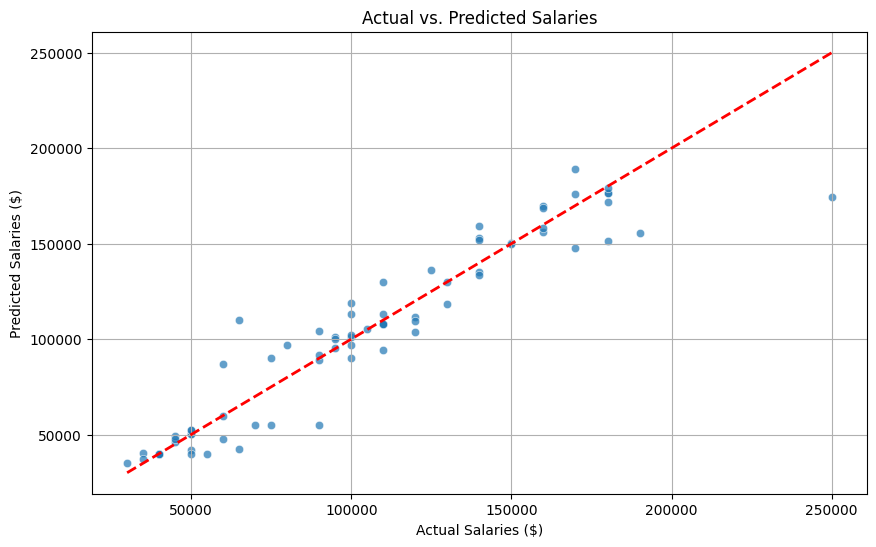

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Salaries ($)")
plt.ylabel("Predicted Salaries ($)")
plt.title("Actual vs. Predicted Salaries")
plt.grid(True)
plt.show()


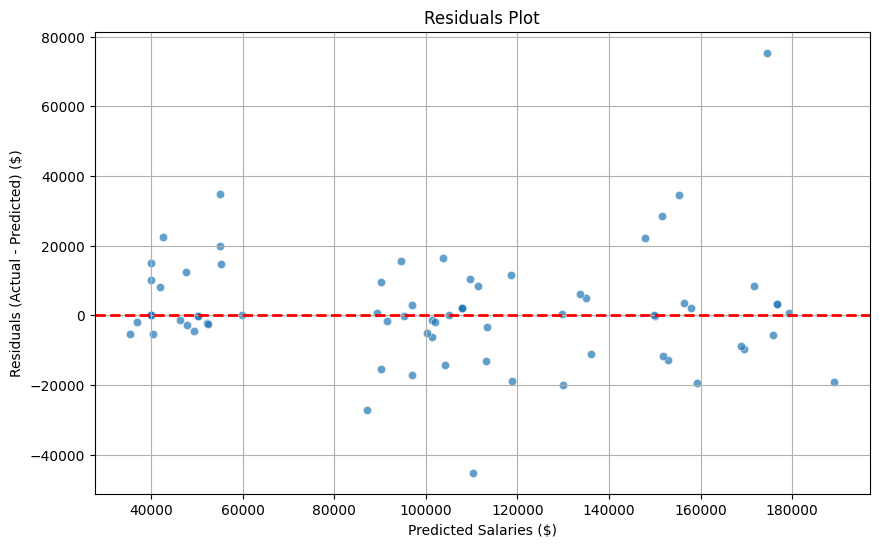

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Salaries ($)")
plt.ylabel("Residuals (Actual - Predicted) ($)")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()


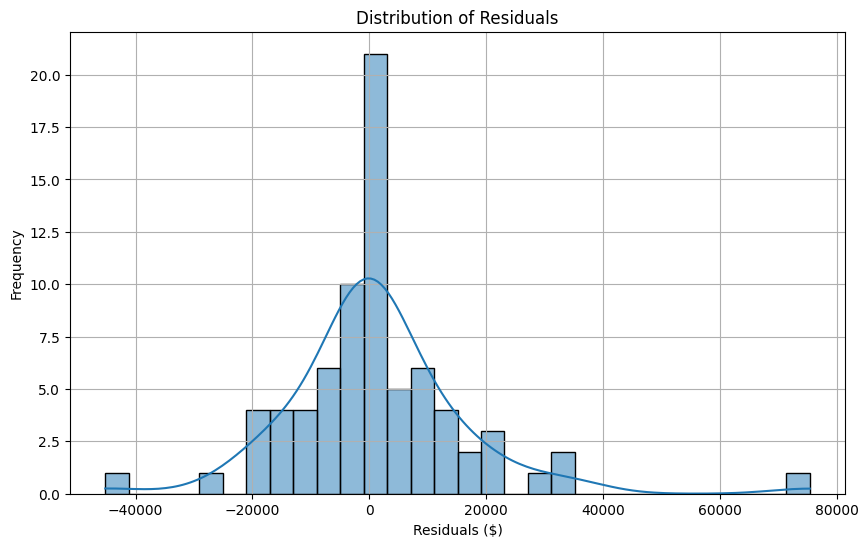


--- Model Saved ---
Random Forest model saved to random_forest_salary_model.pkl


In [22]:
import joblib
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()


# Step 10: Save the Trained Model
# Define the filename for your model
model_filename = 'random_forest_salary_model.pkl'

# Save the trained model to a .pkl file
joblib.dump(model, model_filename)
print(f"\n--- Model Saved ---")
print(f"Random Forest model saved to {model_filename}")